# [9주차] 의사결정나무 (Decision Tree)

@ Date: 2021-04-18 <br>
@ Author: haejiko@gmail.com

## Table of Contents

[1. 실험환경 구성 (Experimental setting)](#1.-실험환경-구성-(Experimental-setting))  
[2. 데이터 불러오기 (Data loading)](#2.-데이터-불러오기-(Data-loading))  
>[데이터 확인](#데이터-확인)  
>[학습, 테스트 데이터 분리](#학습,-테스트-데이터-분리)  

[3. 의사결정나무 모델 구축 (Classification Tree)](#3.-의사결정나무-모델-구축-(Classification-Tree)) 
>[의사결정나무 모델 가시화](#의사결정나무-모델-가시화) 

[4. 의사결정나무 모델 테스트 ](#4.-의사결정나무-모델-테스트) 
>[Cross Validation](#Cross Validation)  

[5. 가지치기 수행 (Pruning phase)](#5.-가지치기-수행-(Pruning-phase)) 

# 1. 실험환경 구성 (Experimental setting)

In [1]:
# 라이브러리 로드
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')


# 2. 데이터 불러오기 (Data loading)

## 데이터 로드

In [2]:
cancer = load_breast_cancer()

## 학습, 테스트 데이터 분리

In [3]:
seed = 2021

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.7, random_state=seed)

# 3. 의사결정나무 모델 구축 (Classification Tree)

In [4]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=156)

## 의사결정나무 모델 가시화

In [5]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = cancer.target_names, feature_names = cancer.feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


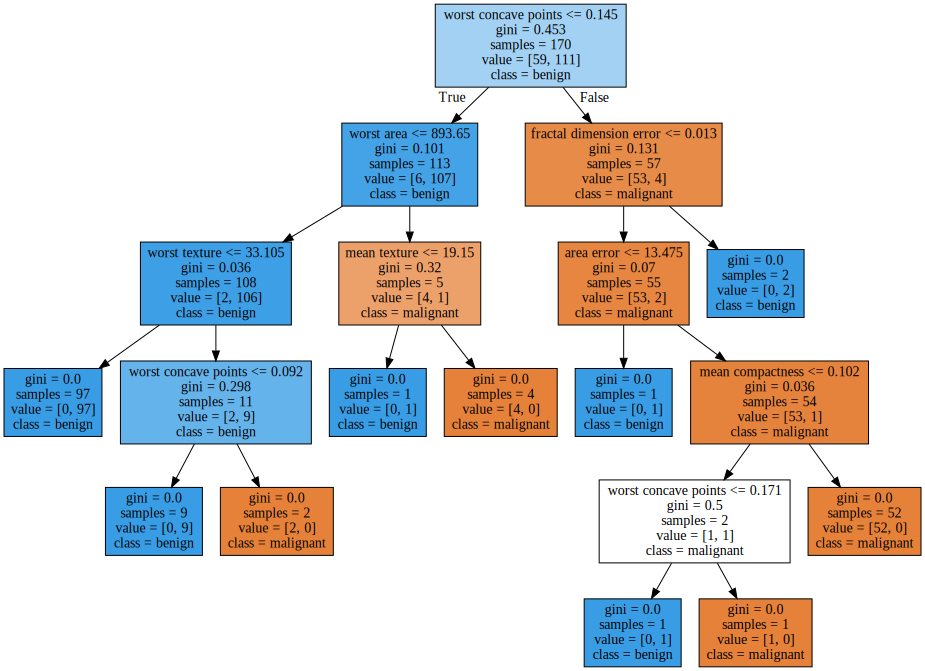

In [7]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값(y label)에 해당하는 데이터 건수

# 4. 의사결정나무 모델 테스트

In [8]:
y_pred = dt_clf.predict(x_test) 

In [9]:

# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9298245614035088 

Accuracy:  0.93 

Recall:  0.98 

Precision:  0.92 

F1_score:  0.94 

Confusion Matrix: 
 [[131  22]
 [  6 240]]


## Cross Validation

In [10]:
# 교차검증

x = cancer.data
y = cancer.target

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9173265020959478


In [11]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.007977,0.000000,0.912281
1,0.008977,0.000000,0.921053
2,0.008976,0.001084,0.921053
3,0.006947,0.000000,0.956140
4,0.008977,0.000997,0.876106


In [12]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9298245614035088

# 5. 가지치기 수행 (Pruning phase)

In [13]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("훈련 세트 정확도: {:.4f}".format(pruned_dt_clf.score(x_train, y_train)))
print("테스트 세트 정확도: {:.4f}".format(pruned_dt_clf.score(x_test, y_test)))


훈련 세트 정확도: 0.9706
테스트 세트 정확도: 0.9424


> 가지치기 수행 전보다 test set에 대한 정확도가 향상됨을 확인할 수 있다. (0.9298 -> 0.9706)

In [14]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = cancer.target_names, feature_names = cancer.feature_names, impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


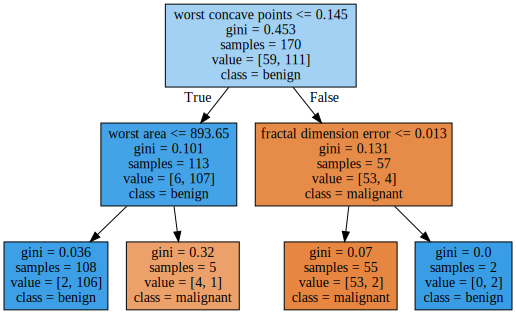

In [15]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<font color=red> ※ Graphviz Error 발생 시, https://graphviz.gitlab.io/ 사이트에 접속해서 installer를 설치하고, <br>
    시스템 환경변수 설정을 완룐 한 후에 파이썬을 세션을 재실행하세요.